<a href="https://colab.research.google.com/github/Shailesh42/project/blob/main/RLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-03185148d877>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_signal[n] = e
<ipython-input-8-03185148d877>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse[n] = e**2
<ipython-input-8-03185148d877>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output[n] = y


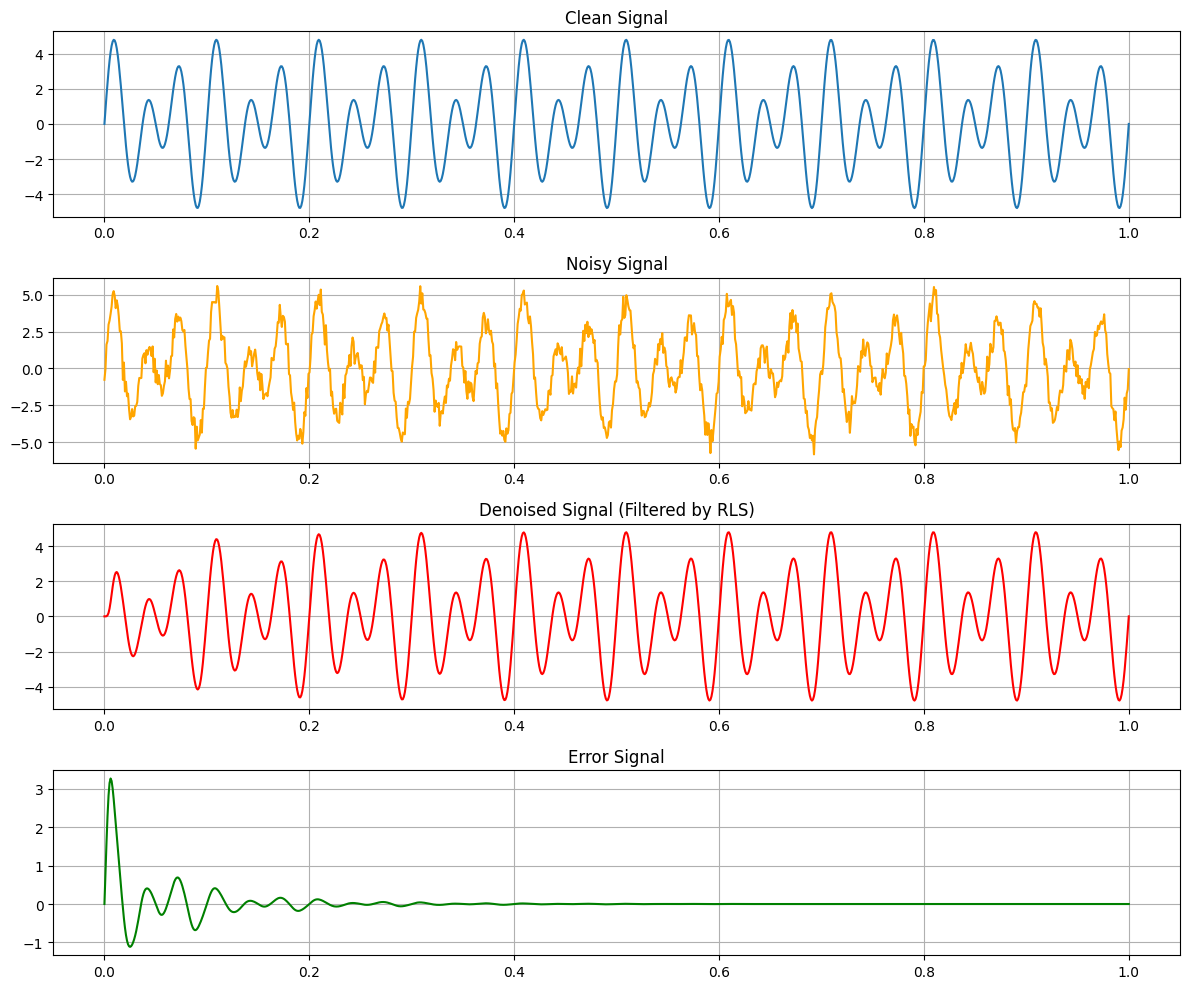

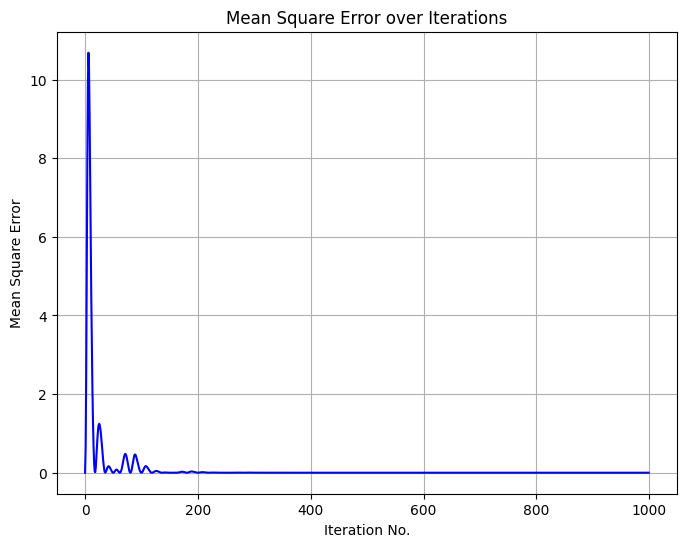

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rls_algorithm(input_signal, desired_signal, N, lambda_, delta):
    num_samples, num_inputs = input_signal.shape
    w = np.zeros((num_inputs, 1))
    P = delta * np.eye(num_inputs)
    output = np.zeros(num_samples)
    error_signal = np.zeros(num_samples)
    mse = np.zeros(num_samples)

    for n in range(num_samples):
        u = input_signal[n, :].reshape(-1, 1)
        k = P @ u / (lambda_ + u.T @ P @ u)
        d = desired_signal[n]
        y = w.T @ u
        e = d - y
        error_signal[n] = e
        mse[n] = e**2

        w = w + k * e
        P = (1 / lambda_) * (P - k @ u.T @ P)
        output[n] = y

    w_final = w
    return w_final, output, error_signal, mse

if __name__ == '__main__':
    fs = 1000
    duration = 1
    t = np.linspace(0, duration, fs * duration)
    clean_signal = 3 * np.sin(2 * np.pi * 30 * t) + 2 * np.sin(2 * np.pi * 20 * t)
    noise = np.random.normal(0, 0.5, clean_signal.shape)
    noisy_signal = clean_signal + noise

    input_matrix = np.column_stack([np.sin(2 * np.pi * 30 * t), np.sin(2 * np.pi * 20 * t)])
    desired_signal = clean_signal

    N = len(t)
    lambda_ = 0.99
    delta = 0.1

    w_final, output, error_signal, mse = rls_algorithm(input_matrix, desired_signal, N, lambda_, delta)

    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    plt.plot(t, clean_signal, label='Clean Signal')
    plt.title('Clean Signal')
    plt.grid(True)

    plt.subplot(4, 1, 2)
    plt.plot(t, noisy_signal, label='Noisy Signal', color='orange')
    plt.title('Noisy Signal')
    plt.grid(True)

    plt.subplot(4, 1, 3)
    plt.plot(t, output, label='Denoised Signal (Filtered)', color='r')
    plt.title('Denoised Signal (Filtered by RLS)')
    plt.grid(True)

    plt.subplot(4, 1, 4)
    plt.plot(t, error_signal, label='Error Signal', color='g')
    plt.title('Error Signal')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(N), mse, label='Mean Square Error', color='b')
    plt.title('Mean Square Error over Iterations')
    plt.xlabel('Iteration No.')
    plt.ylabel('Mean Square Error')
    plt.grid(True)
    plt.show()
